<div style="text-align:center; border-radius:15px 50px; padding:20px; color:white; margin:0; font-size:180%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>🛍️Predict Customer Purchase Behavior</b>
</div>

# 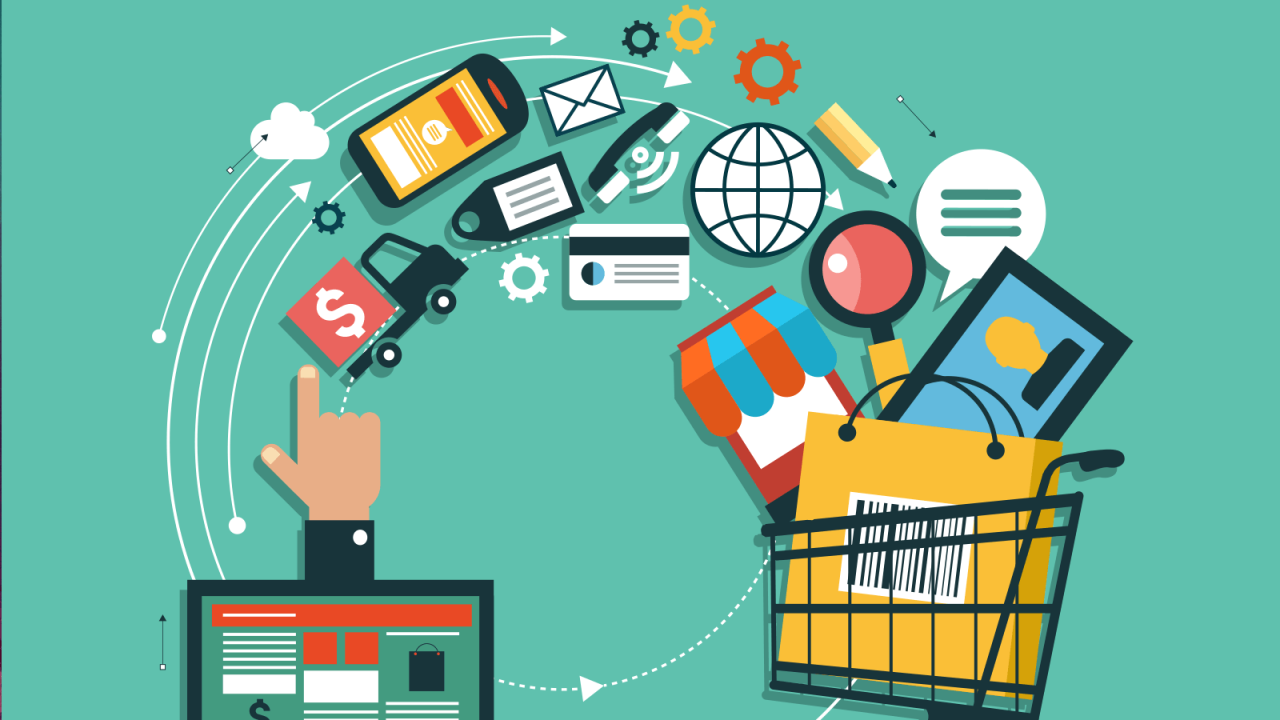

<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>Table of contents</b>
</div>



- <a href="#libraries">1. Import Libraries</a>
- <a href="#data">2. Read and analyze the Data</a>
    - <a href="#stat">2.1. Data Statistics</a> 
- <a href="#visual">3. Data Visualization</a>
- <a href="#preprocessing">4. Data Preprocessing</a>
    - <a href="#sep">4.1. Separate features and labels</a>   
- <a href="#build">5. Build ML models and Evaluation or Normalization</a>
- <a href="#conclusion">6. Conclusion</a> 

<a id="libraries"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>1. Import Libraries</b>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

<a id="Data"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>2. Read and analyze the Data</b>
</div>


In [2]:
df=pd.read_csv('/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv')

In [3]:
df

Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5               1  
1              38.240097               0                 5               0  
2              31.633212               1                 0               1  
3              46.167059               0                 4               1  
4              19.823592               0                 0               1  
...                  ...             ...               ...             ...  
1495           34.590743               0                 5               1  
1496           17.625707               0                 1               1  
1497           12.206033               0                 0               0  
1498           37.311634               1                 0               1  
1499           25.348017               1                 4               1  

[1500 rows x 9 columns]

In [4]:
df.shape

(1500, 9)

In [5]:
df.size

13500

In [6]:
df.sum()

Age                   6.644800e+04
Gender                7.570000e+02
AnnualIncome          1.263737e+08
NumberOfPurchases     1.563000e+04
ProductCategory       3.019000e+03
TimeSpentOnWebsite    4.570356e+04
LoyaltyProgram        4.900000e+02
DiscountsAvailed      3.833000e+03
PurchaseStatus        6.480000e+02
dtype: float64

In [7]:
df.isnull()

Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
0     False   False         False              False            False   
1     False   False         False              False            False   
2     False   False         False              False            False   
3     False   False         False              False            False   
4     False   False         False              False            False   
...     ...     ...           ...                ...              ...   
1495  False   False         False              False            False   
1496  False   False         False              False            False   
1497  False   False         False              False            False   
1498  False   False         False              False            False   
1499  False   False         False              False            False   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0                  False           False             False           False  
1                  False           False             False           False  
2                  False           False             False           False  
3                  False           False             False           False  
4                  False           False             False           False  
...                  ...             ...               ...             ...  
1495               False           False             False           False  
1496               False           False             False           False  
1497               False           False             False           False  
1498               False           False             False           False  
1499               False           False             False           False  

[1500 rows x 9 columns]

In [8]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

<a id="stat"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>2.1. Data Statistics </b>
</div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [10]:
df.describe()

Age       Gender   AnnualIncome  NumberOfPurchases  \
count  1500.000000  1500.000000    1500.000000        1500.000000   
mean     44.298667     0.504667   84249.164338          10.420000   
std      15.537259     0.500145   37629.493078           5.887391   
min      18.000000     0.000000   20001.512518           0.000000   
25%      31.000000     0.000000   53028.979155           5.000000   
50%      45.000000     1.000000   83699.581476          11.000000   
75%      57.000000     1.000000  117167.772858          15.000000   
max      70.000000     1.000000  149785.176481          20.000000   

       ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  \
count      1500.000000         1500.000000     1500.000000       1500.000000   
mean          2.012667           30.469040        0.326667          2.555333   
std           1.428005           16.984392        0.469151          1.705152   
min           0.000000            1.037023        0.000000          0.000000   
25%           1.000000           16.156700        0.000000          1.000000   
50%           2.000000           30.939516        0.000000          3.000000   
75%           3.000000           44.369863        1.000000          4.000000   
max           4.000000           59.991105        1.000000          5.000000   

       PurchaseStatus  
count      1500.00000  
mean          0.43200  
std           0.49552  
min           0.00000  
25%           0.00000  
50%           0.00000  
75%           1.00000  
max           1.00000

<a id="visual"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>3. Data Visualization </b>
</div>

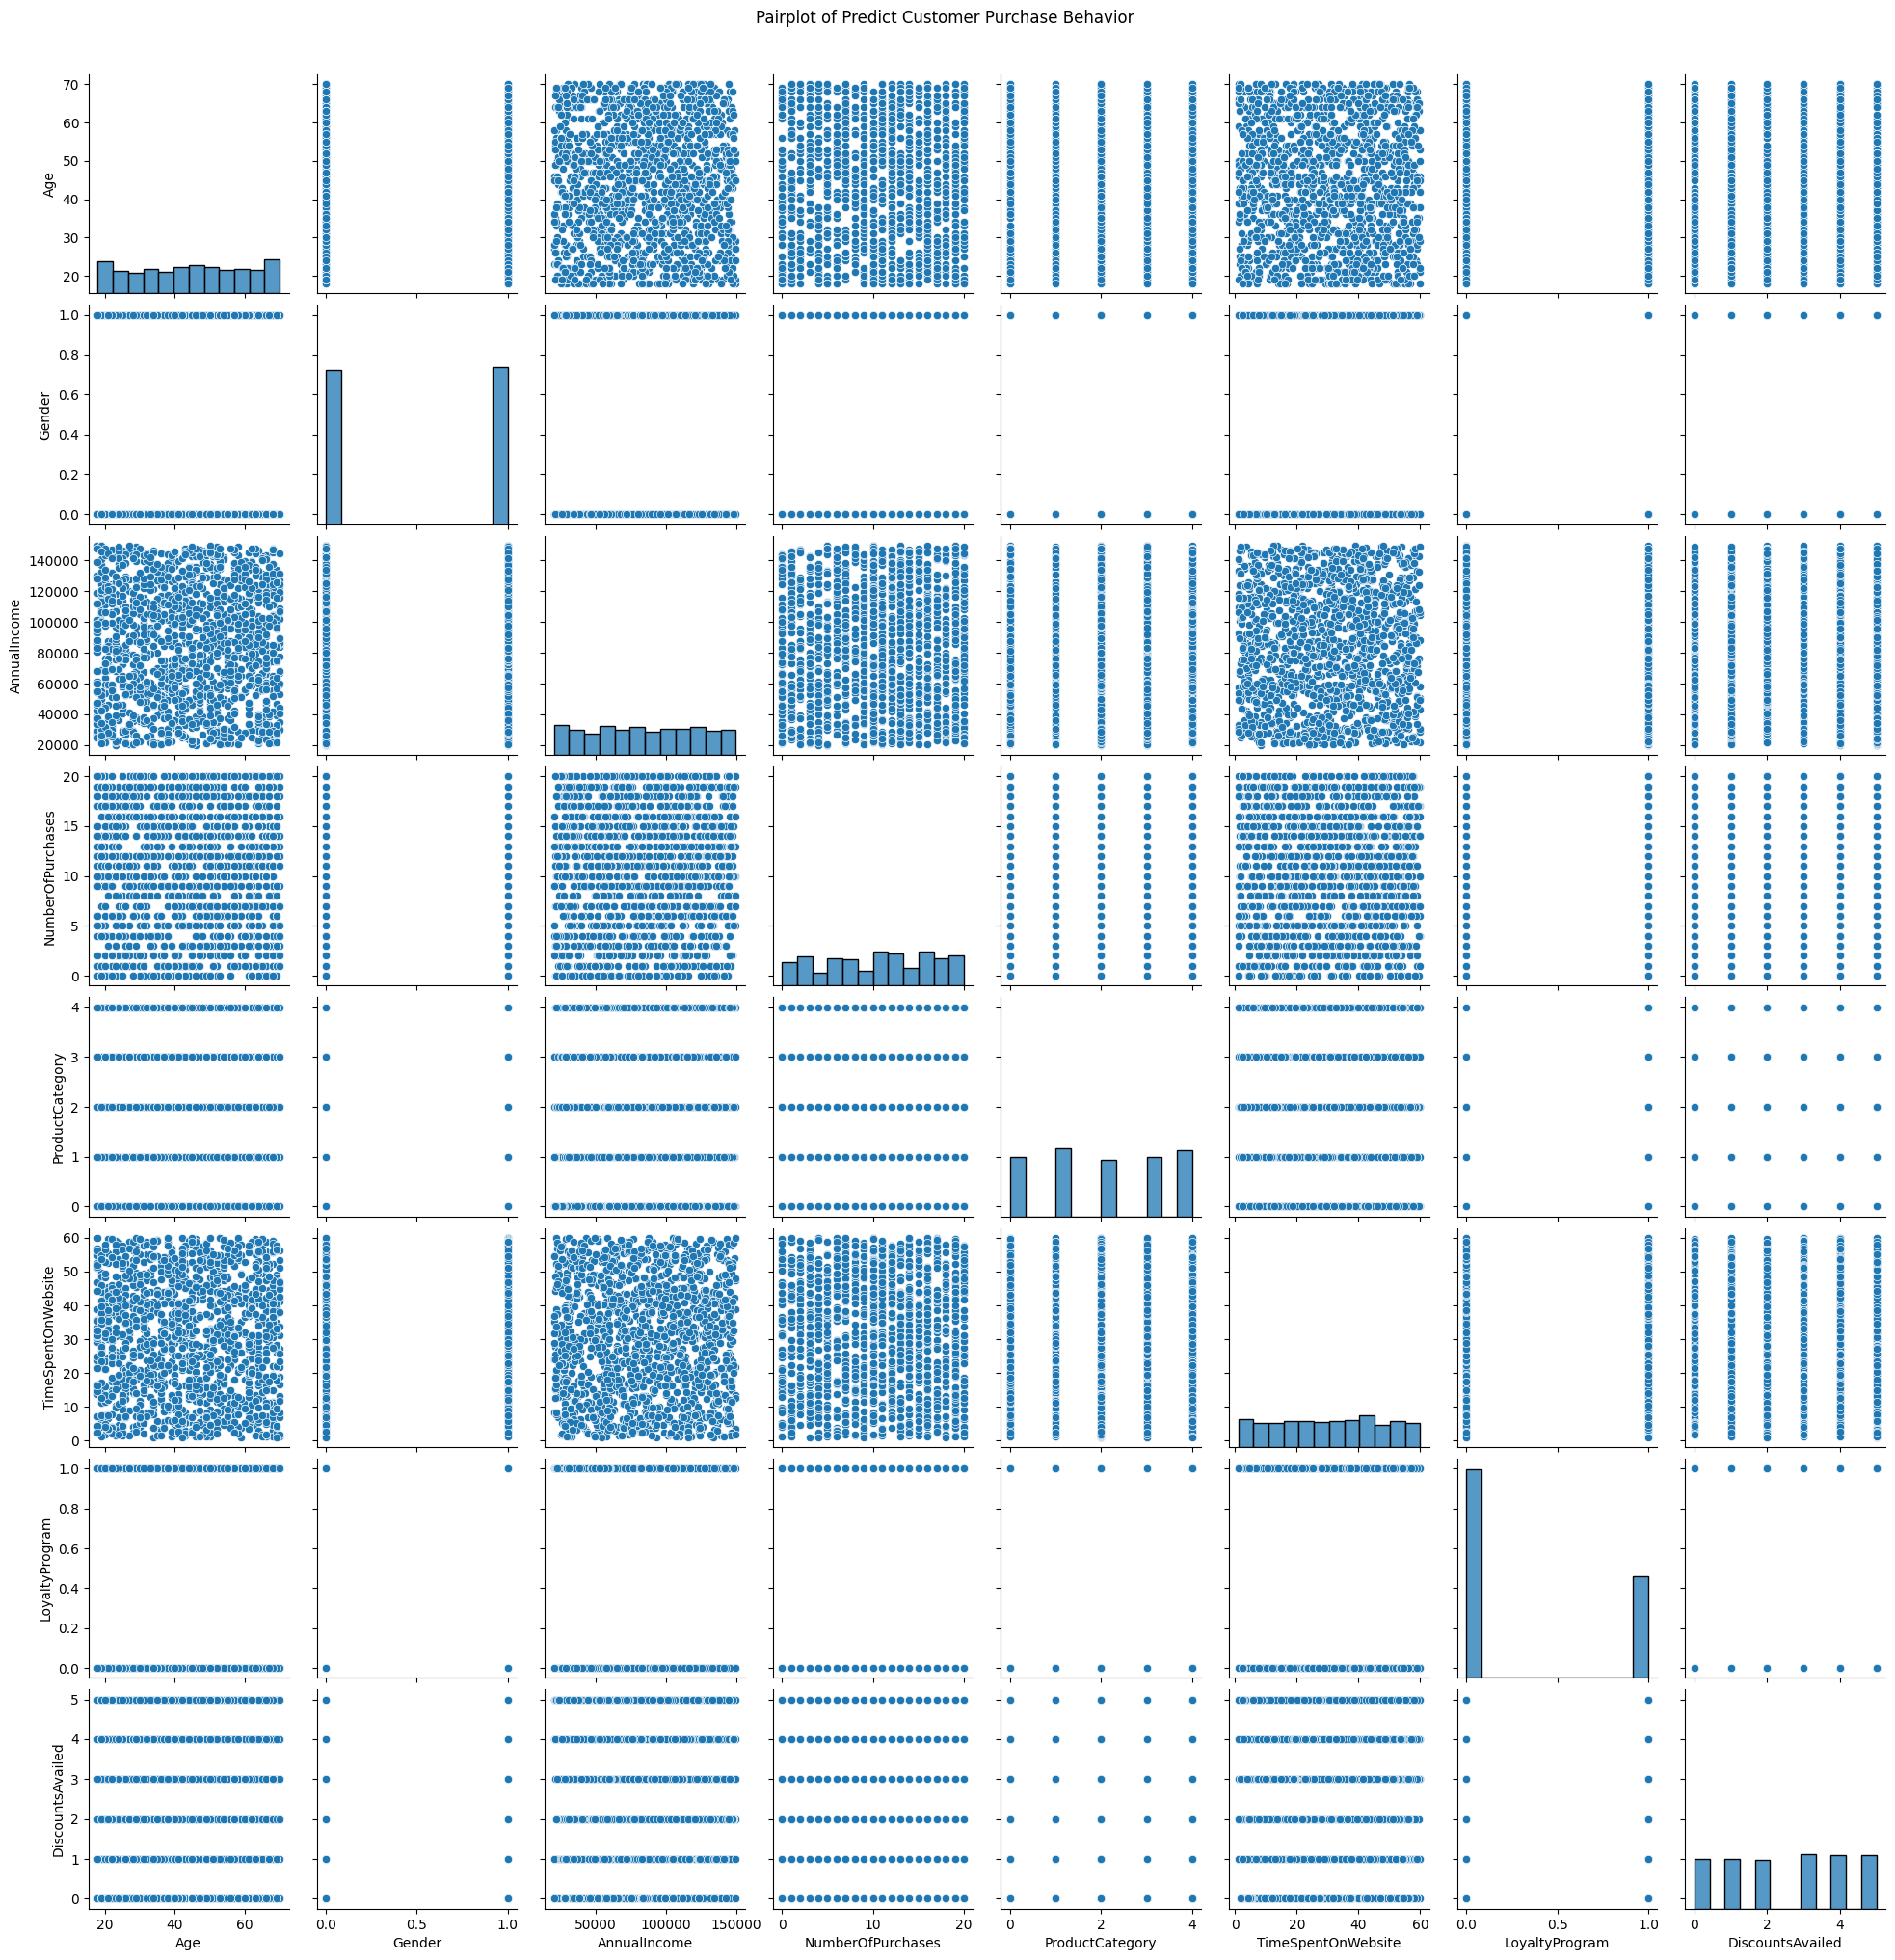

In [11]:
other_attributes = ['Age','Gender','AnnualIncome','NumberOfPurchases','ProductCategory','TimeSpentOnWebsite','LoyaltyProgram','DiscountsAvailed']

pairplot = sns.pairplot(df[other_attributes], palette='viridis')

pairplot.fig.suptitle('Pairplot of Predict Customer Purchase Behavior ', y=1.02)

plt.show()

Text(0.5, 1.02, 'Pairplot of Predict Customer Purchase Behavior ')

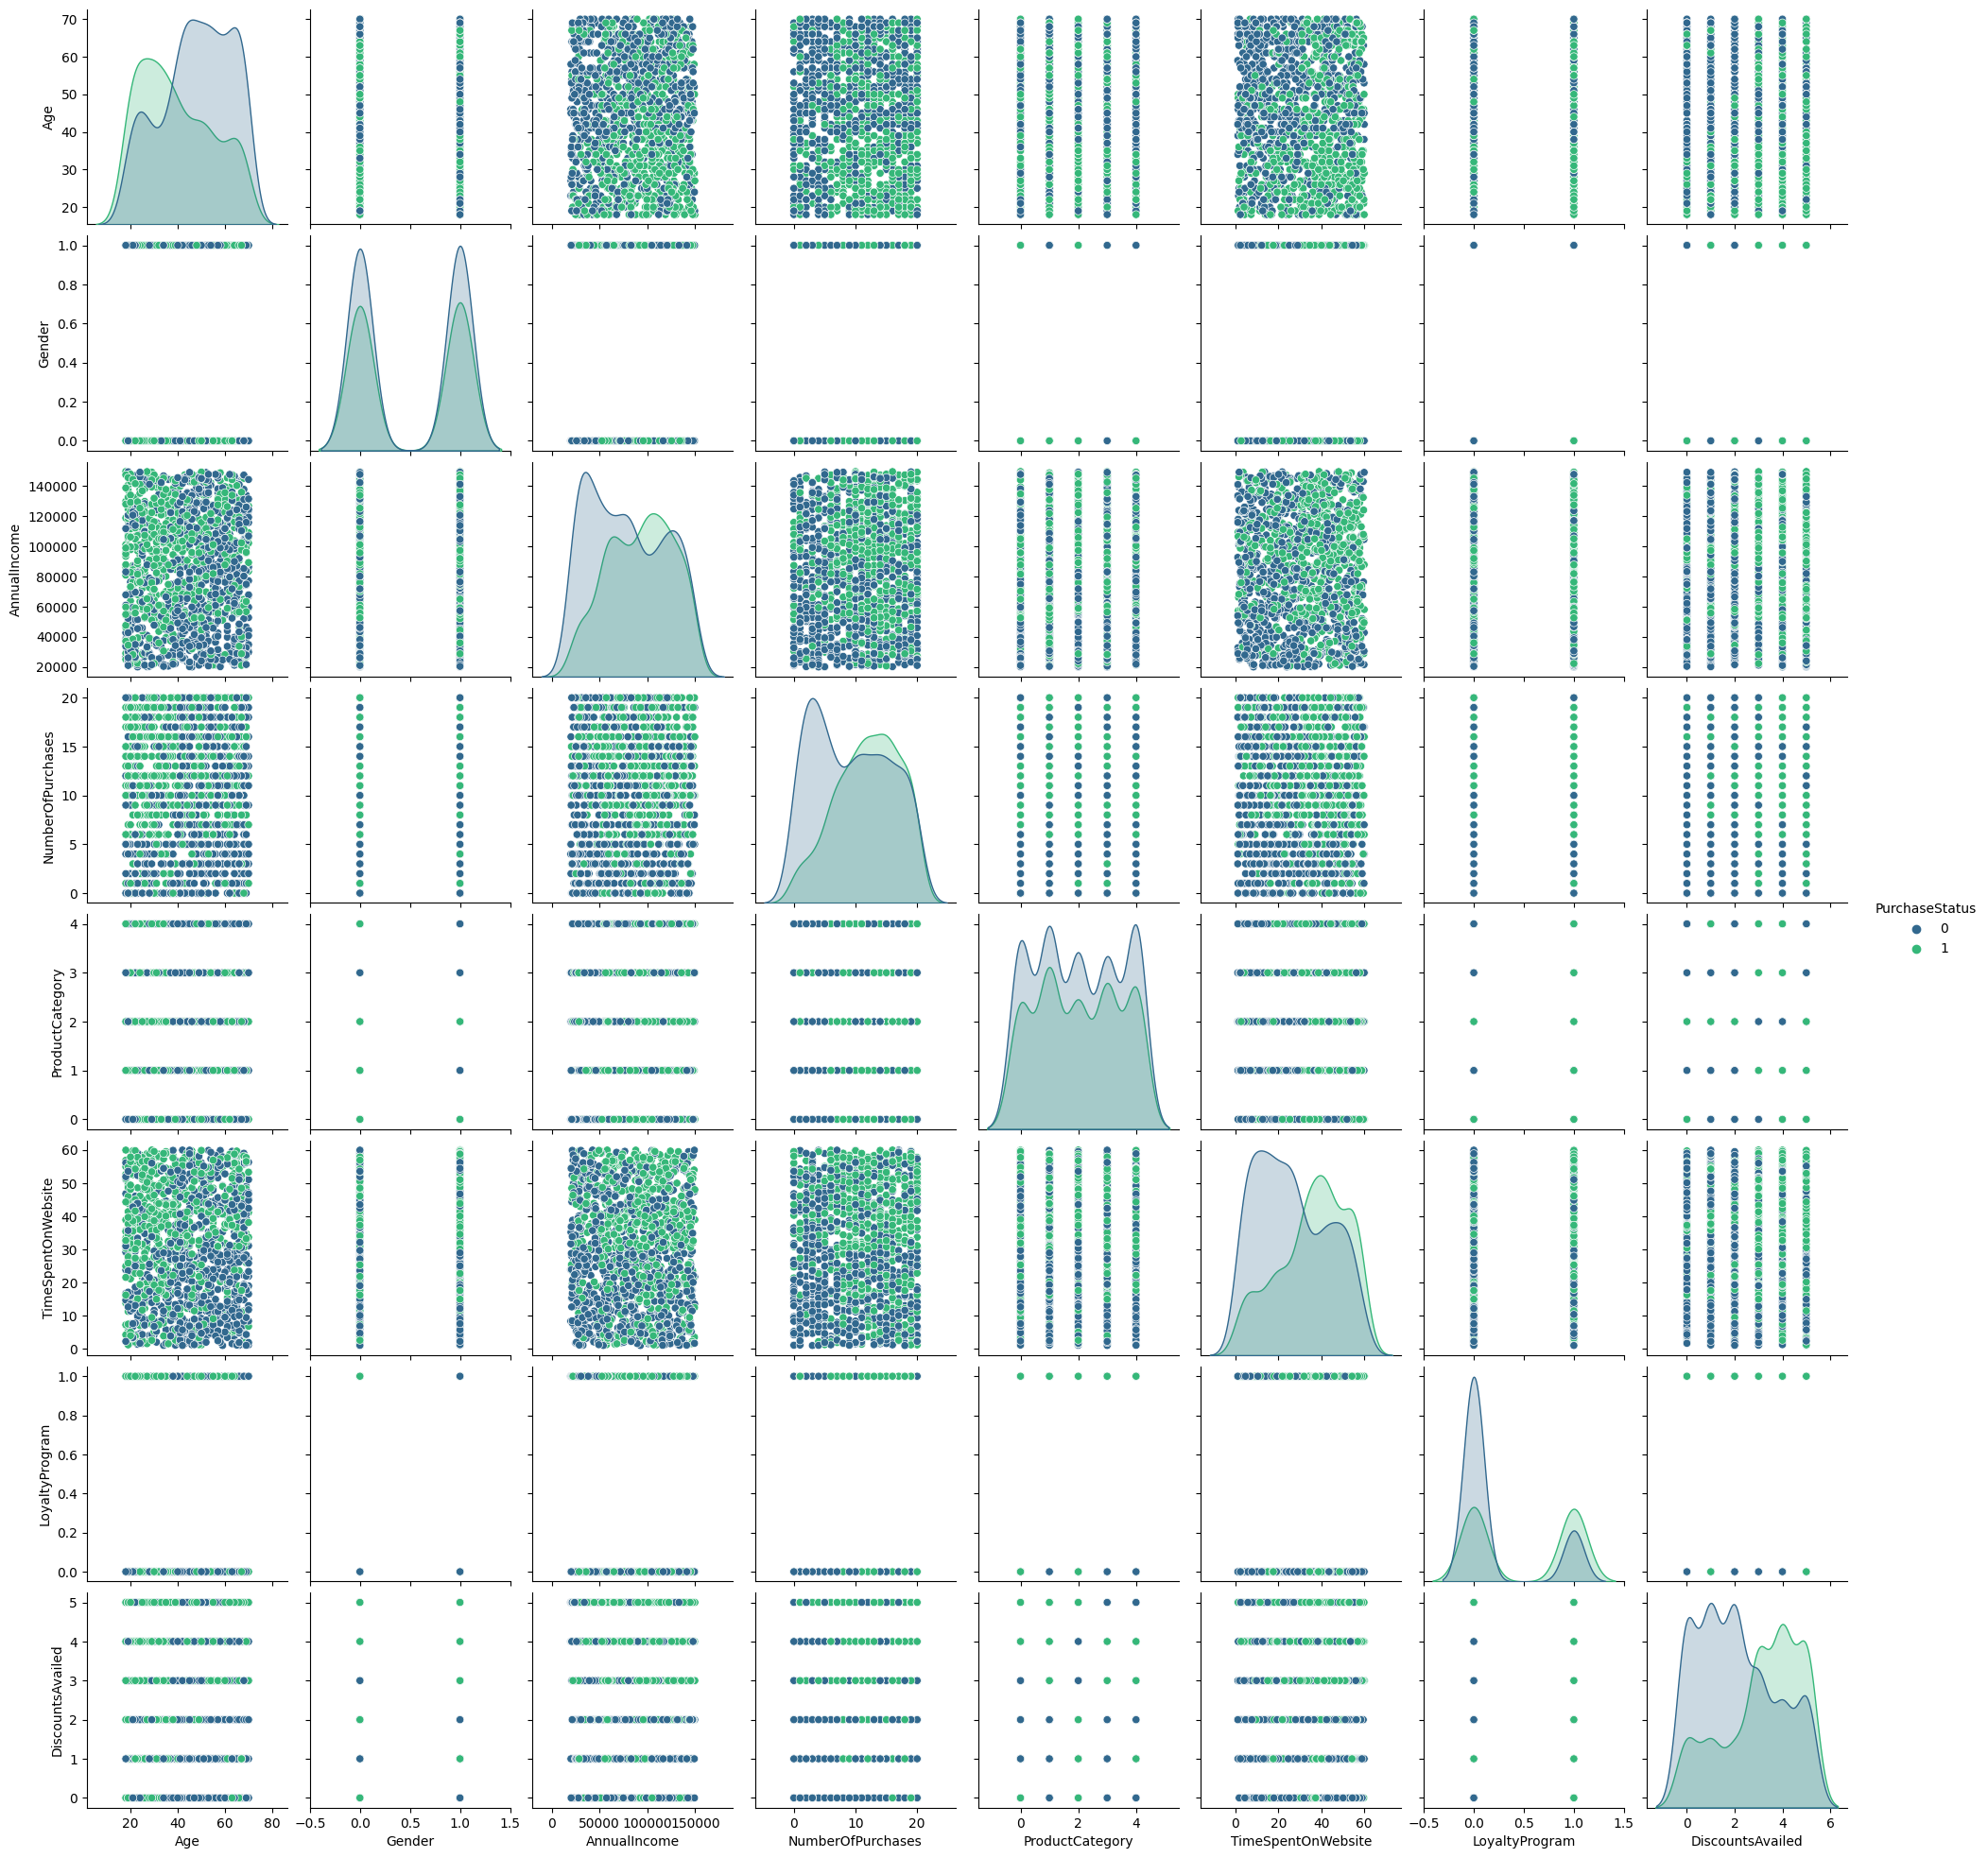

In [12]:
sns.pairplot(df, hue='PurchaseStatus', palette='viridis')
pairplot.fig.suptitle('Pairplot of Predict Customer Purchase Behavior ', y=1.02)

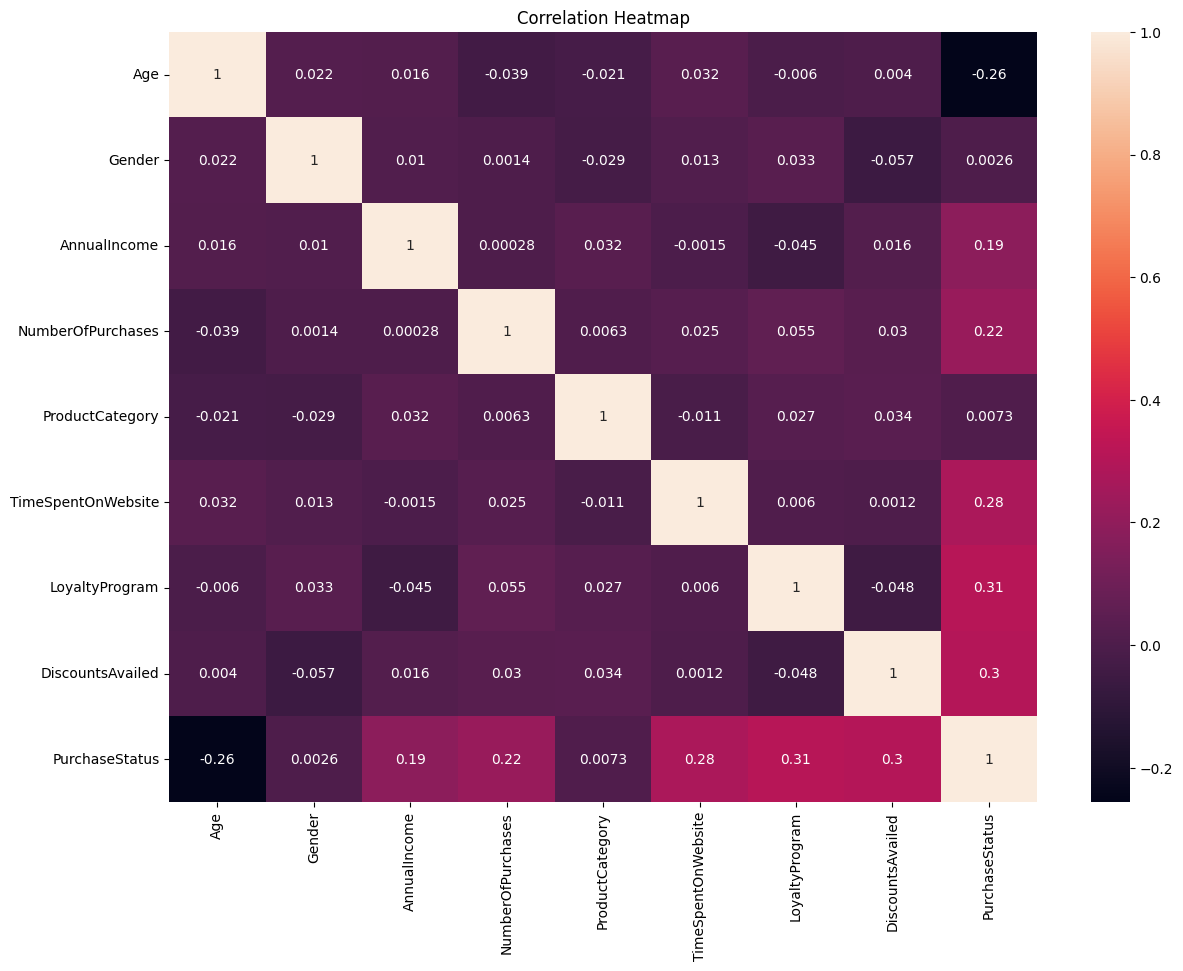

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
features = df.columns[:-1].values
label = [df.columns[-1]]

print ("The Features are:", features)
print ("The Label is:", label)

The Features are: ['Age' 'Gender' 'AnnualIncome' 'NumberOfPurchases' 'ProductCategory'
 'TimeSpentOnWebsite' 'LoyaltyProgram' 'DiscountsAvailed']
The Label is: ['PurchaseStatus']


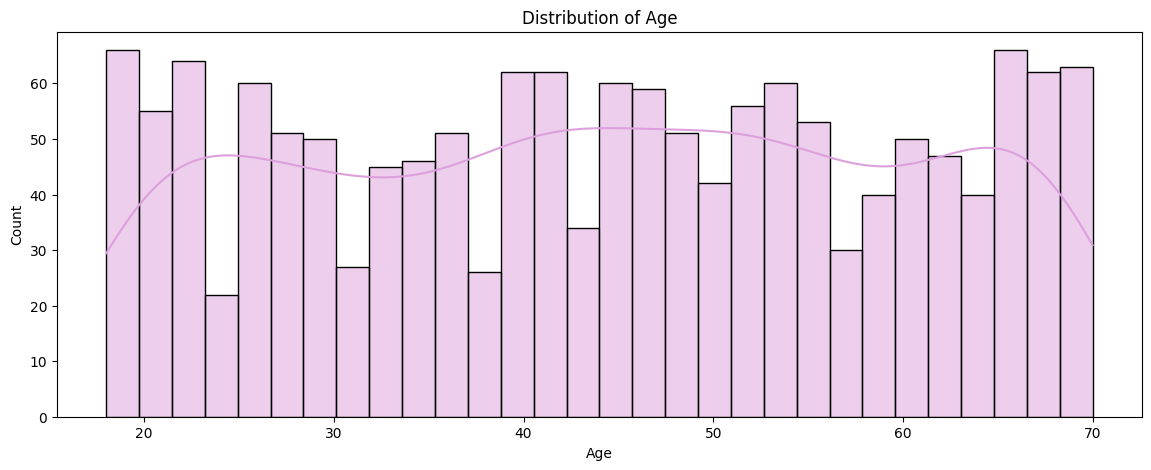

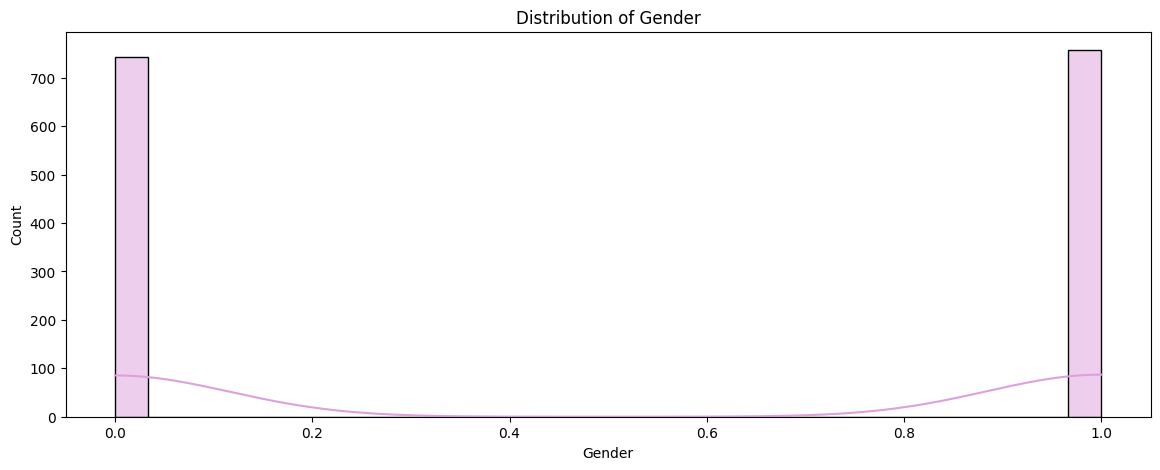

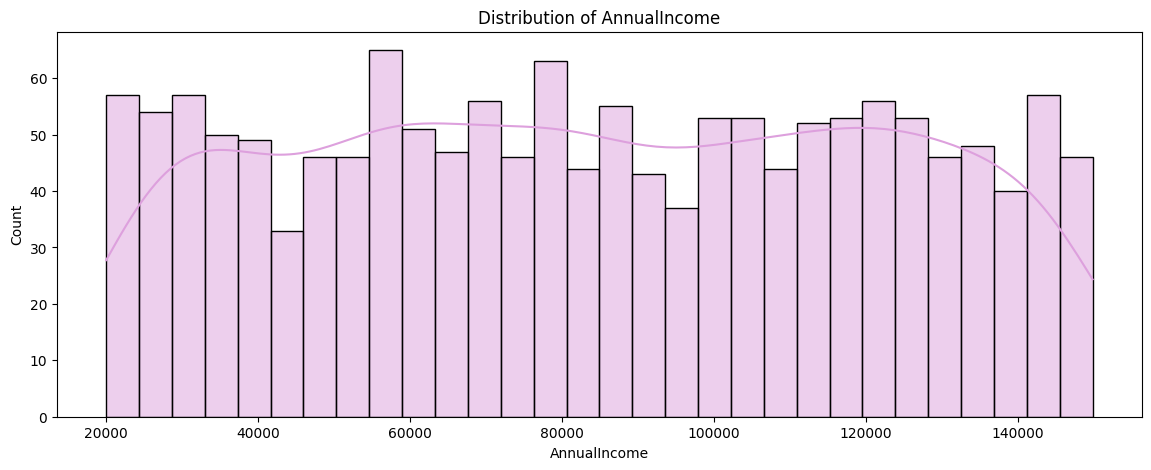

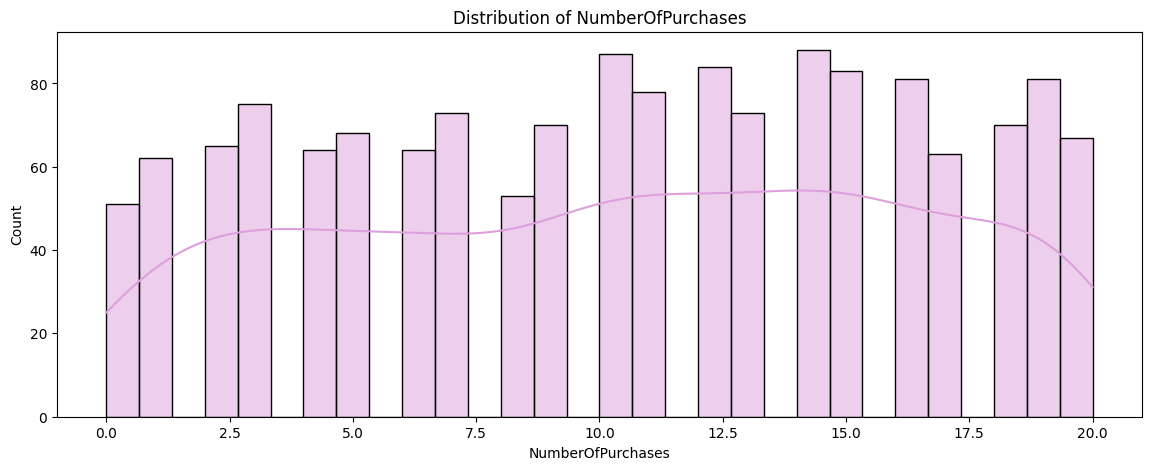

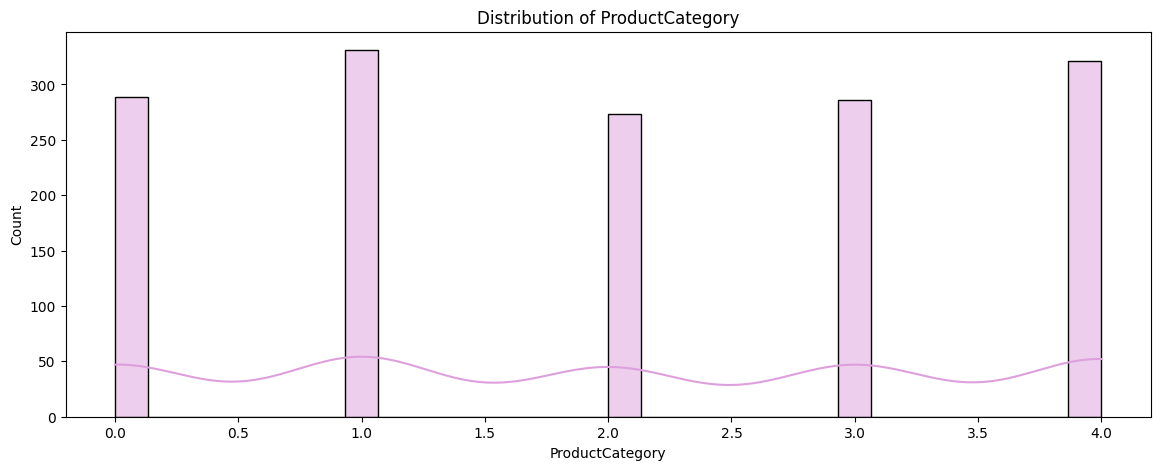

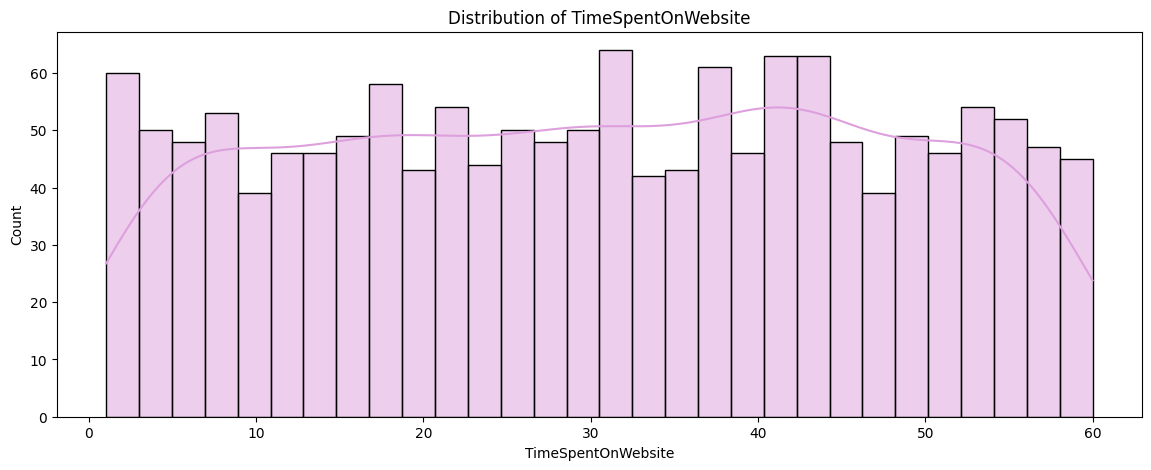

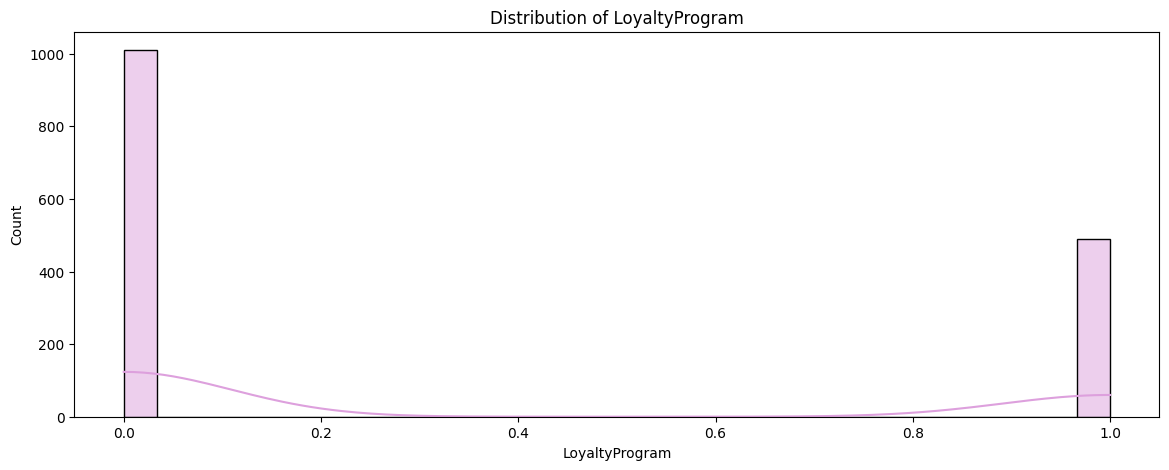

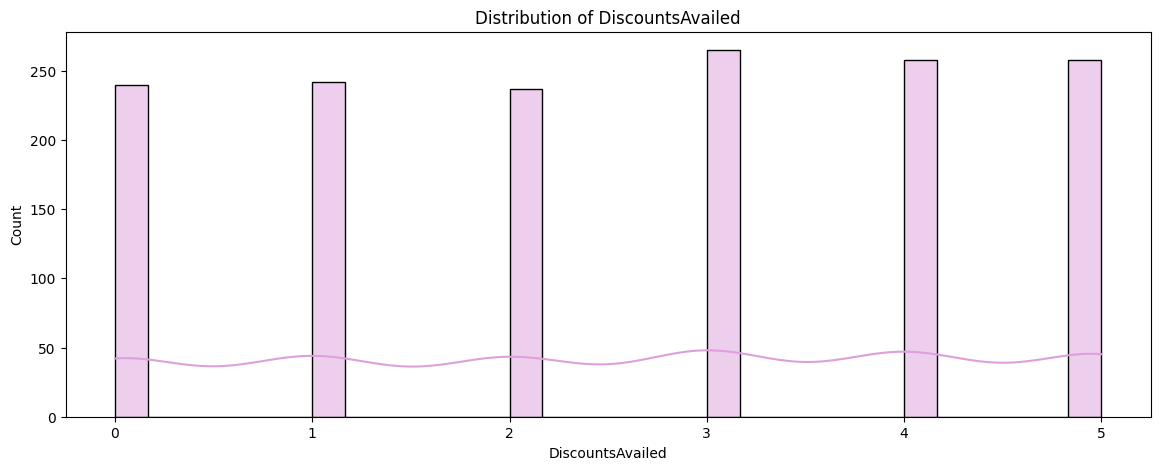

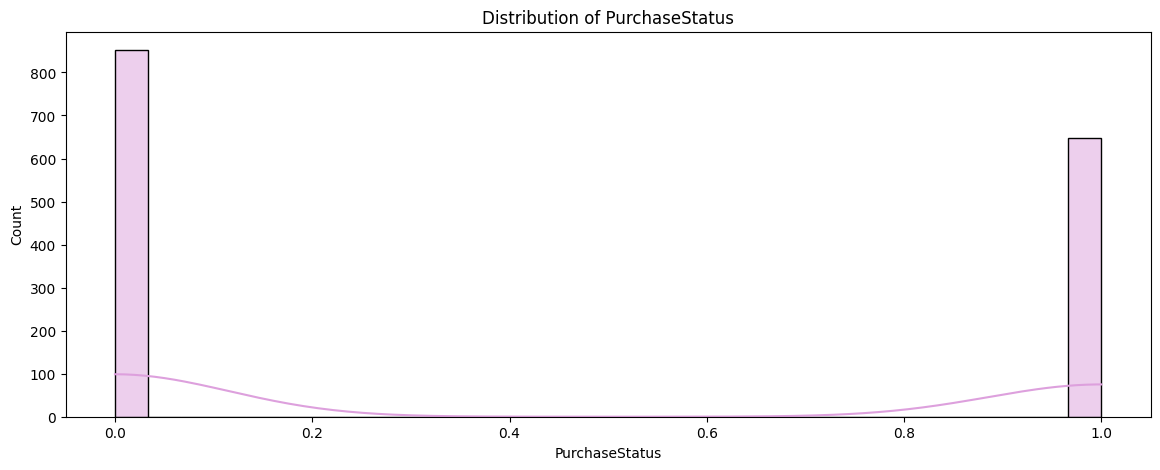

In [15]:
for column in df:
    plt.figure(figsize=(14, 5))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

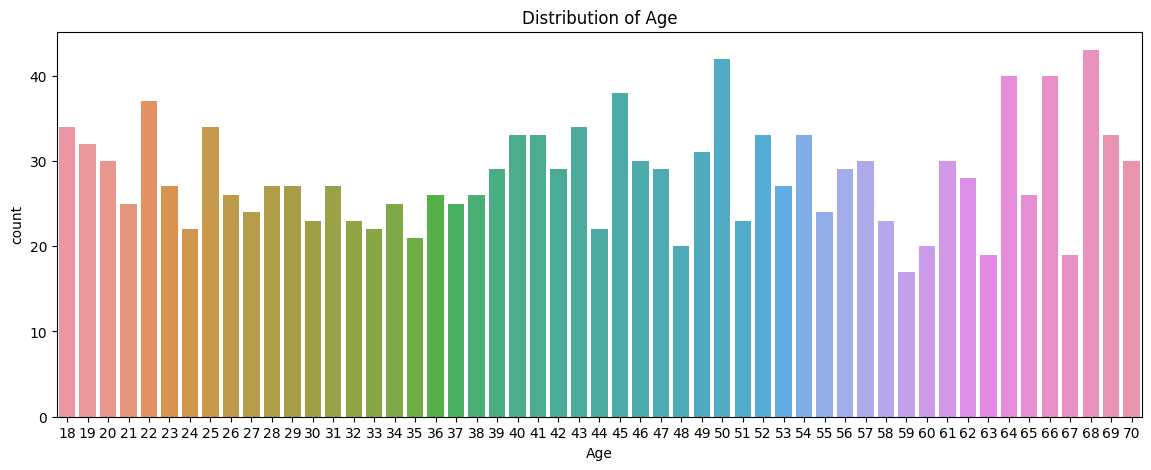

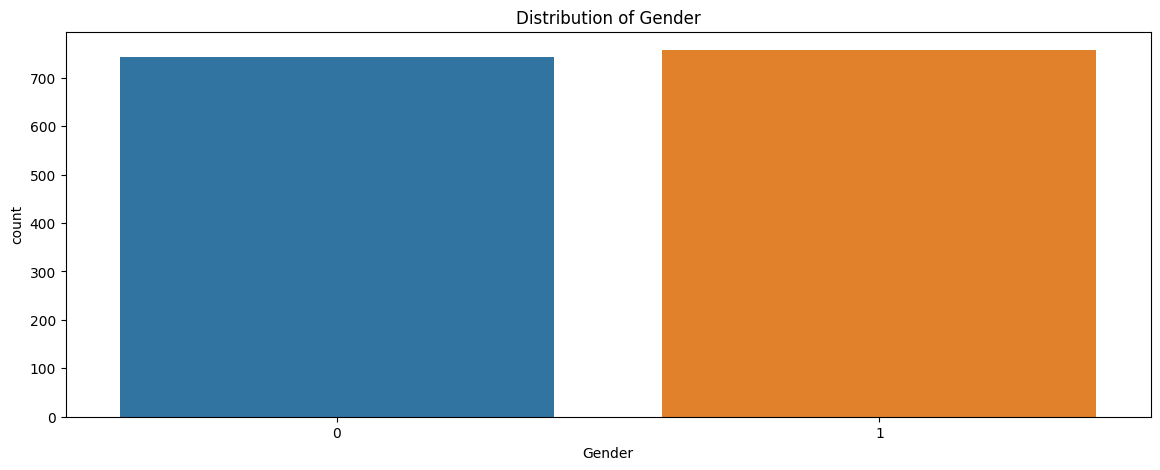

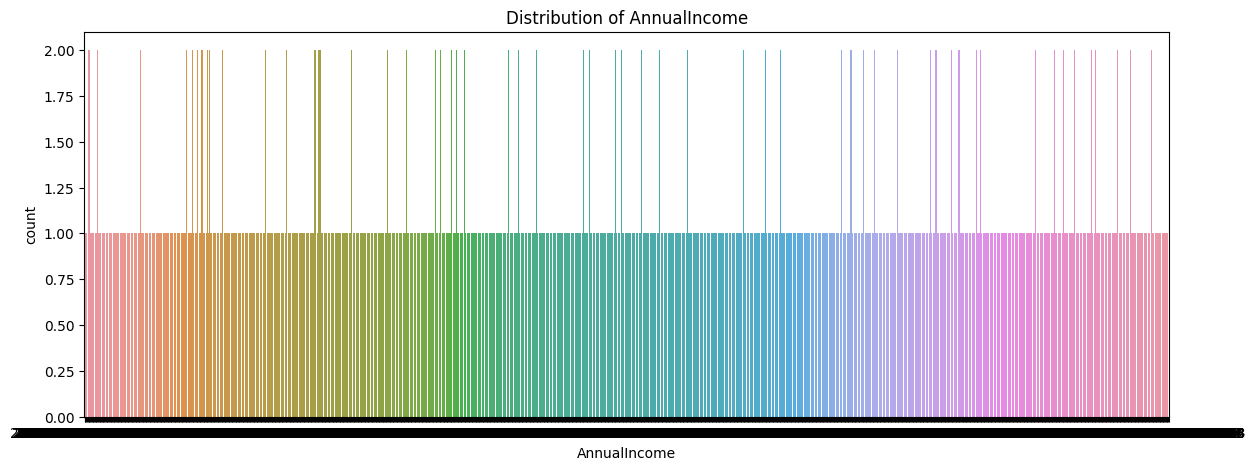

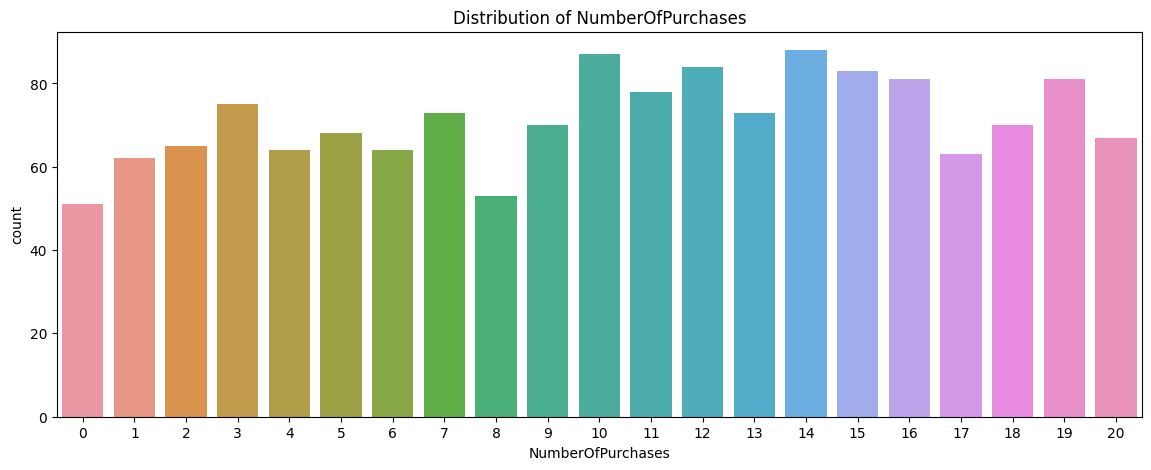

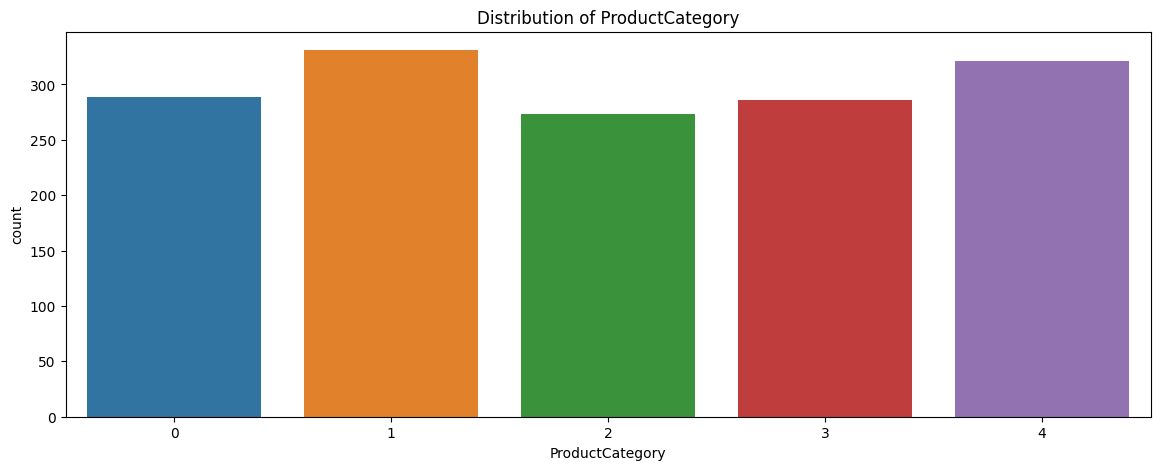

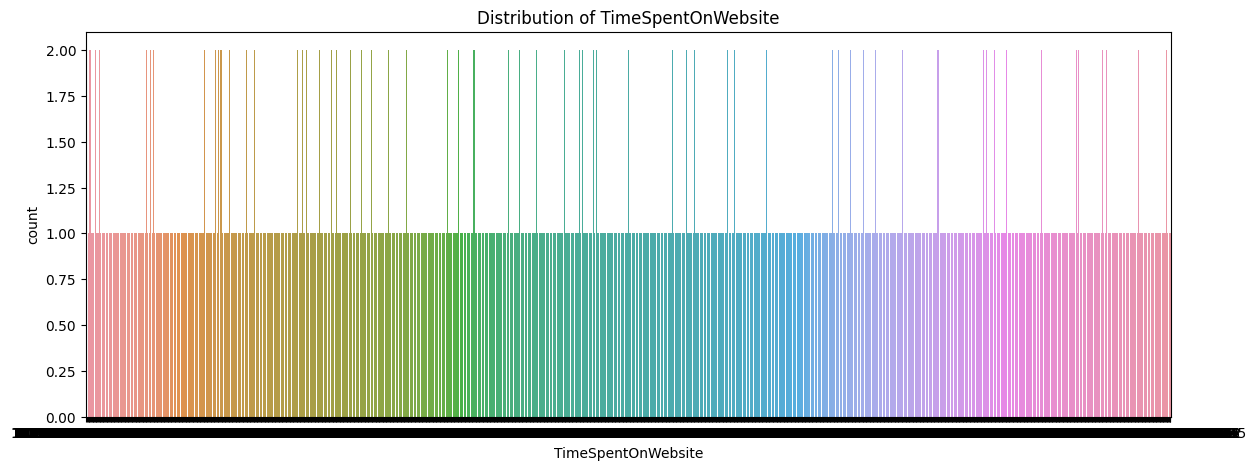

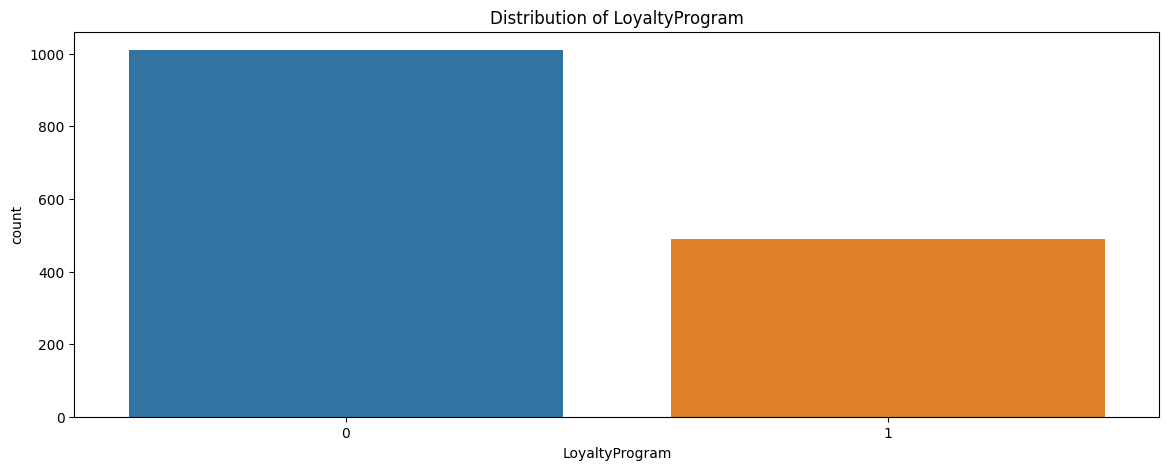

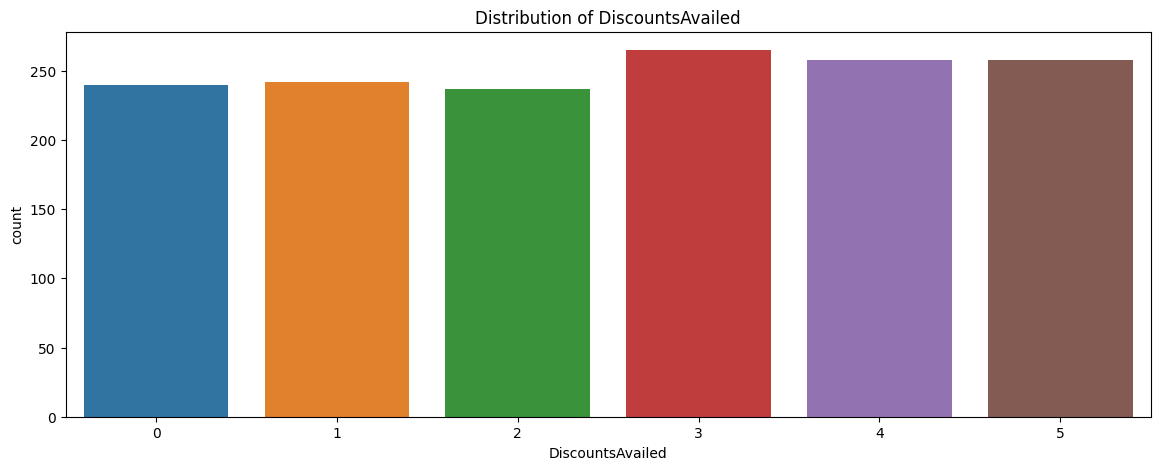

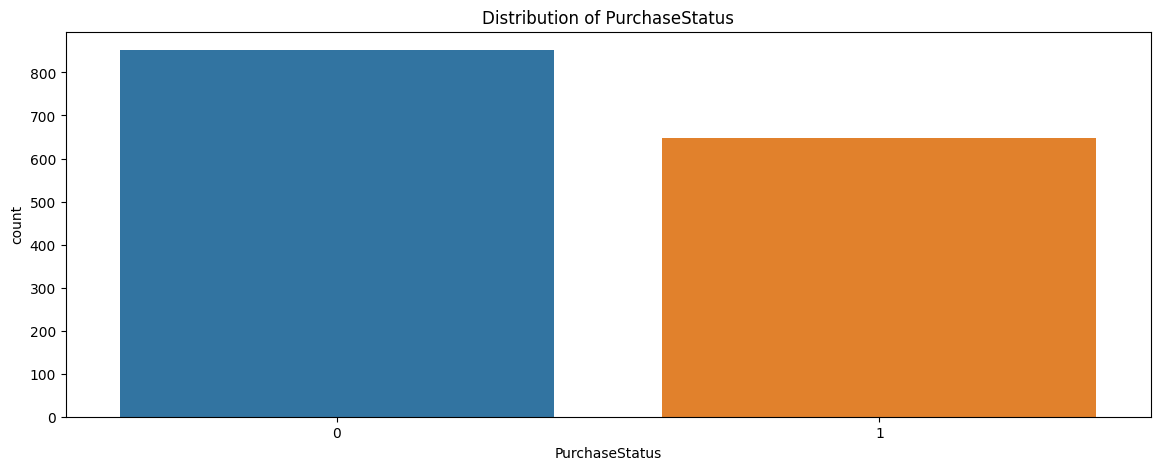

In [16]:
for column in df:
    plt.figure(figsize=(14, 5)) 
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

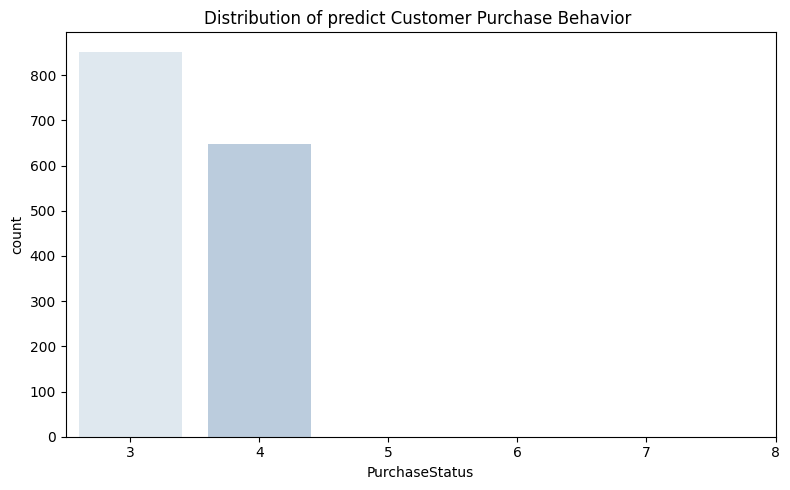

In [17]:
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x=('PurchaseStatus'), ax=ax, palette=sns.color_palette("BuPu"))
ax.set_title('Distribution of predict Customer Purchase Behavior ')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

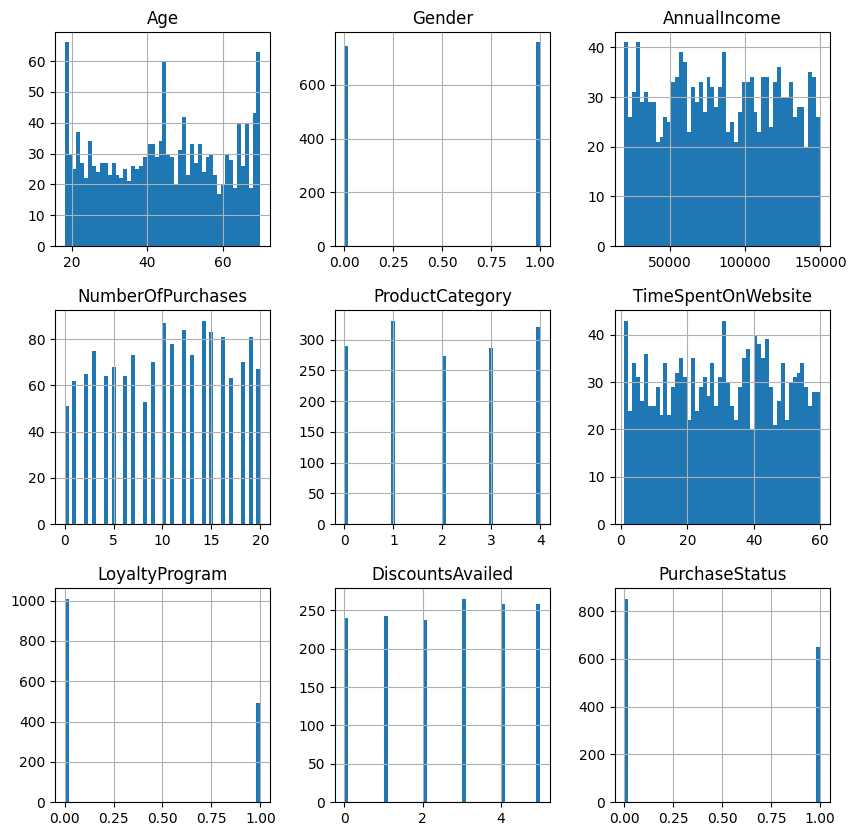

In [18]:
df.hist(figsize=(10,10),bins=50)
plt.show()

<a id="Preprosessing"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>4. Data Preprosessing </b>
</div>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

In [20]:
x=df.iloc[:,:-1]
y=df["PurchaseStatus"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
x

Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  
0              30.568601               0                 5  
1              38.240097               0                 5  
2              31.633212               1                 0  
3              46.167059               0                 4  
4              19.823592               0                 0  
...                  ...             ...               ...  
1495           34.590743               0                 5  
1496           17.625707               0                 1  
1497           12.206033               0                 0  
1498           37.311634               1                 0  
1499           25.348017               1                 4  

[1500 rows x 8 columns]

In [23]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    1
Name: PurchaseStatus, Length: 1500, dtype: int64

<a id="Sep"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:170%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>4.1. Separate features and labels </b>
</div>

In [24]:
x_train.shape

(1050, 8)

In [25]:
x_train.shape[0]

1050

In [26]:
x_test.shape

(450, 8)

In [27]:
x_test.shape[0]

450

<a id="build"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:180%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>5. Build ML models, Normalization and Evaluation</b>
</div>

# **LogisticRegression**

In [28]:
 model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
model.score(x_train,y_train)*100

74.66666666666667

In [31]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

#  **DecisionTreeClassifier**

In [32]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
model.score(x_train,y_train)*100

100.0

In [34]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **RandomForestClassifier**

In [35]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
model.score(x_train,y_train)*100

100.0

In [37]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **GradientBoostingClassifier**

In [38]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [39]:
model.score(x_train,y_train)*100

95.71428571428572

In [40]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **AdaBoostClassifier**

In [41]:
model= AdaBoostClassifier()
model.fit(x_train,y_train)

AdaBoostClassifier()

In [42]:
model.score(x_train,y_train)*100

93.42857142857143

In [43]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **KNeighborsClassifier**

In [44]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
model.score(x_train,y_train)*100

73.14285714285714

In [46]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **LogisticRegression**

In [47]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
model.score(x_train,y_train)*100

74.66666666666667

In [49]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1])

# **SGDClassifier**

In [50]:
model=SGDClassifier()
model.fit(x_train,y_train)

SGDClassifier()

In [51]:
model.score(x_train,y_train)*100

56.666666666666664

In [52]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([0])

# **SVC**

In [53]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [54]:
model.score(x_train,y_train)*100

59.04761904761905

In [55]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([0])

# **xgboost**

In [56]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier','LogisticRegression','SGDClassifier', 'SVC'],
    'Score percentage': [100.0,100.0,95.71,93.42,73.14,74.66,43.33,59.04]})
result_df = results.sort_values(by='Score percentage', ascending=False)
result_df = result_df.set_index('Score percentage')
result_df

Model
Score percentage                            
100.00                DecisionTreeClassifier
100.00                RandomForestClassifier
95.71             GradientBoostingClassifier
93.42                     AdaBoostClassifier
74.66                     LogisticRegression
73.14                   KNeighborsClassifier
59.04                                    SVC
43.33                          SGDClassifier

<a id="Conclusion"></a>
<div style="text-align:center; border-radius:15px 50px; padding:9px; color:white; margin:0; font-size:180%; font-family:Pacifico; background-color:purple; overflow:hidden;">
  <b>6. Conclusion</b>
</div>

**<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #DDA0DD;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em; ">
        <li><strong> RandomForestClassifier seems to be a strong candidate for this task due to its high accuracy and tendency to avoid overfitting compared to a single decision tree. However, GradientBoostingClassifier and AdaBoostClassifier are also excellent choices and may offer better generalization.</li>
    </ul>
</div>


<div style="text-align:center; border-radius:15px 50px; padding:30px; color:black; margin:0; font-size:300%; font-family:Pacifico; background-color:white; overflow:hidden;">
  <b>*Thankyou*</b>
</div>